In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING LIBRARIES AND LOADING GRAPH DATASET

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

(34, 78)

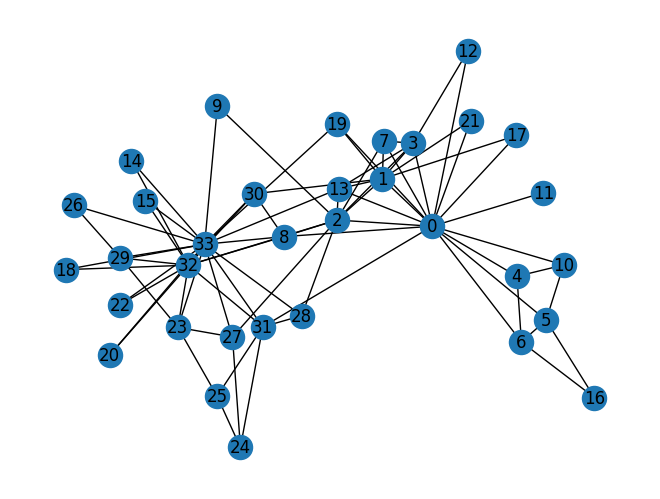

In [ ]:
G=nx.karate_club_graph()
nx.draw(G,with_labels=True)
len(G.nodes),len(G.edges)

#COMMUNITY DETECTION USING GIRVAN-NEWMAN ARCHITECTURE

In [ ]:
def edge_to_remove(graph):
    edge_betweenness=nx.edge_betweenness_centrality(graph)
    return max(edge_betweenness, key=edge_betweenness.get)

In [ ]:
def girvan_newman(graph):
    sg_count=nx.number_connected_components(graph)
    while sg_count==1:
        edge=edge_to_remove(graph)
        graph.remove_edge(*edge)
        sg_count=nx.number_connected_components(graph)
    return nx.connected_components(graph)

In [ ]:
c=girvan_newman(G.copy())
node_groups=[]
for i in c:
  node_groups.append(list(i))

node_groups

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

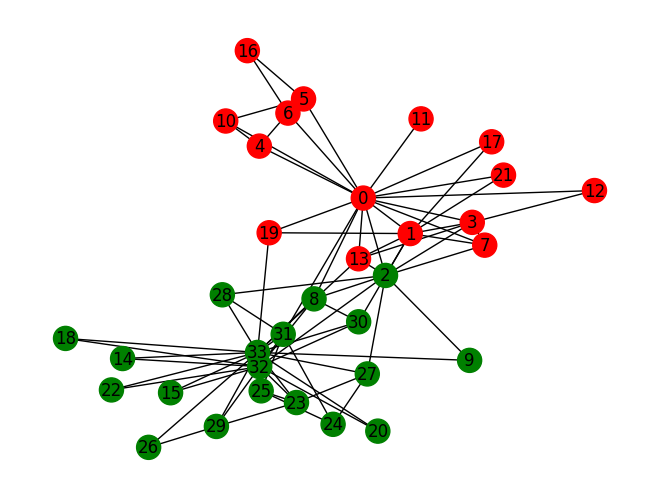

In [ ]:
color_map=[]
for node in G:
  if node in node_groups[0]:
    color_map.append('red')
  else:
    color_map.append('green')
nx.draw(G,node_color=color_map,with_labels=True)
plt.show()

#MODULARITY OF COMMUNITY DETECTION

In [ ]:
from networkx.algorithms.community import modularity
c = girvan_newman(G.copy())
node_groups = []
for community in c:
    node_groups.append(list(community))

mod_value = modularity(G, node_groups)

print(f"Node groups (communities): {node_groups}")
print(f"Modularity: {mod_value:.4f}")

Node groups (communities): [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Modularity: 0.3477


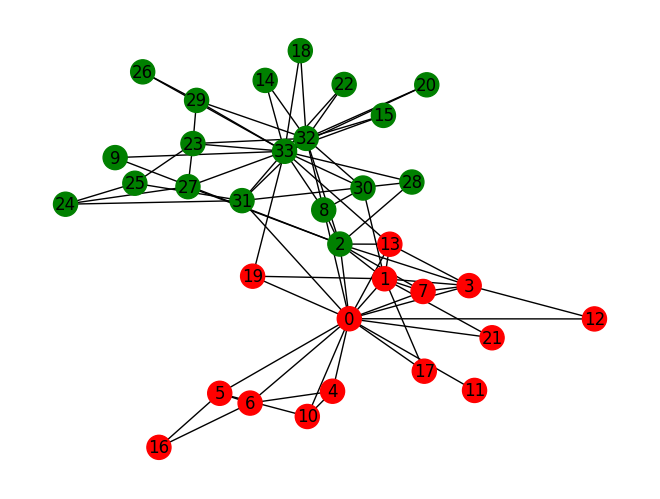

In [ ]:
color_map = []
for node in G:
  if node in node_groups[0]:
    color_map.append('red')
  else:
    color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

#CALCULATION OF DEGREE CENTRALITY






In [ ]:
degree_centrality=nx.degree_centrality(G)
ranked_nodes=sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)

In [ ]:
print("Nodes ranked by degree centrality:")
for node,centrality in ranked_nodes:
    print(f"Node {node}: {centrality:.4f}")

highest_centrality_node=ranked_nodes[0]
print(f"\nNode with the highest degree centrality: Node {highest_centrality_node[0]} with centrality {highest_centrality_node[1]:.4f}")
print("\nThe node with the highest centrality might play a central role in connecting many other nodes. It could indicate that this node is a hub or leader within the network, influencing communication or interactions between others.")

Nodes ranked by degree centrality:
Node 33: 0.5152
Node 0: 0.4848
Node 32: 0.3636
Node 2: 0.3030
Node 1: 0.2727
Node 3: 0.1818
Node 31: 0.1818
Node 8: 0.1515
Node 13: 0.1515
Node 23: 0.1515
Node 5: 0.1212
Node 6: 0.1212
Node 7: 0.1212
Node 27: 0.1212
Node 29: 0.1212
Node 30: 0.1212
Node 4: 0.0909
Node 10: 0.0909
Node 19: 0.0909
Node 24: 0.0909
Node 25: 0.0909
Node 28: 0.0909
Node 9: 0.0606
Node 12: 0.0606
Node 14: 0.0606
Node 15: 0.0606
Node 16: 0.0606
Node 17: 0.0606
Node 18: 0.0606
Node 20: 0.0606
Node 21: 0.0606
Node 22: 0.0606
Node 26: 0.0606
Node 11: 0.0303

Node with the highest degree centrality: Node 33 with centrality 0.5152

The node with the highest centrality might play a central role in connecting many other nodes. It could indicate that this node is a hub or leader within the network, influencing communication or interactions between others.


#CALCULATION OF BETWEENNESS CENTRALITY

In [ ]:
betweenness_centrality=nx.betweenness_centrality(G)
ranked_nodes=sorted(betweenness_centrality.items(),key=lambda x: x[1],reverse=True)

In [ ]:
print("Top 5 nodes ranked by betweenness centrality:")
for i in range(5):
    node,centrality=ranked_nodes[i]
    print(f"Node {node}: {centrality:.4f}")
highest_betweenness_node=ranked_nodes[0]
print(f"\nNode with the highest betweenness centrality: Node {highest_betweenness_node[0]} with centrality {highest_betweenness_node[1]:.4f}")

Top 5 nodes ranked by betweenness centrality:
Node 0: 0.4376
Node 33: 0.3041
Node 32: 0.1452
Node 2: 0.1437
Node 31: 0.1383

Node with the highest betweenness centrality: Node 0 with centrality 0.4376
